INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 5, 'problem': 'Rastrigin', 'problem_size': 100, 'communication_type': 'mutation_many_many', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': {'type': 'global', 'start': 30, 'max': 50}, 'population size': 5, 'offspring size': 15, 'agent_modification': None, 'base_probability': 0.0005, 'delete agents': True}
INFO:root:Socjo started
INFO:root:Socjo finished in 31.328845298290254
INFO:root:plotting finished in 0.0
INFO:root:Single comparison finished in 31.328845298290254
INFO:root:Socjo started
INFO:root:Socjo finished in 32.05597108205159
INFO:root:plotting finished in 0.0
INFO:root:Island comparison finished in 32.05597108205159
INFO:root:Socjo started
Progress: 100%|##########| 625000/625000 [44:47<00:00, 232.58it/s]  
INFO:root:Socjo finished in 44.78895819981893
INFO:root:plotting finished in 0.0
INFO:root:Run 0 out of 3


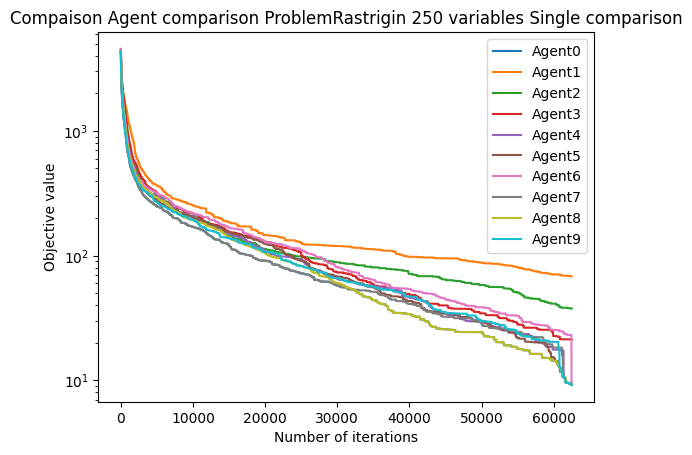

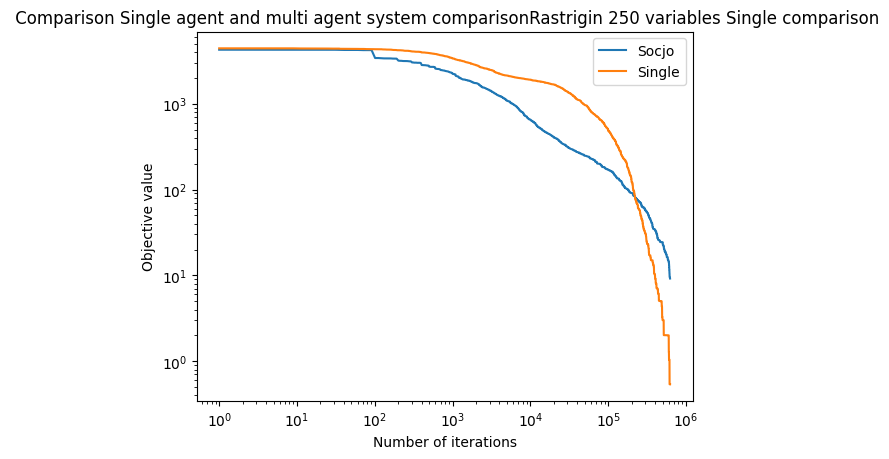

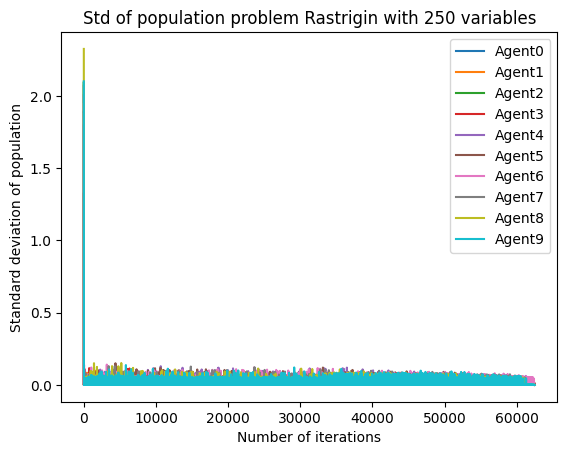

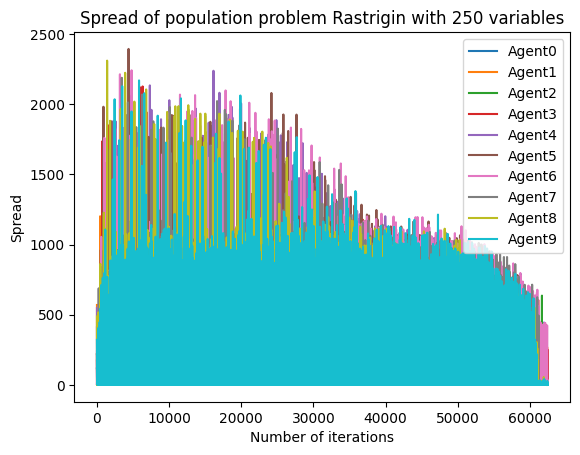

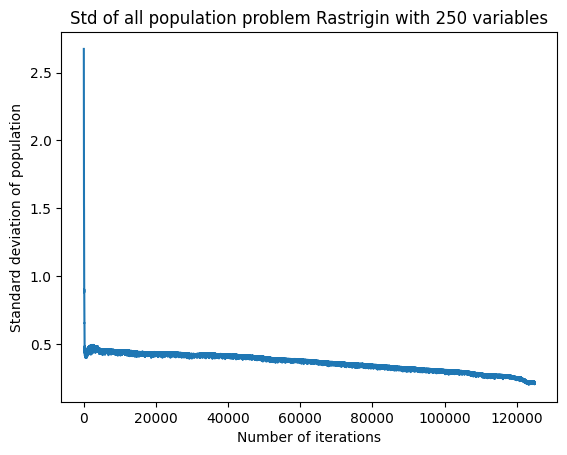

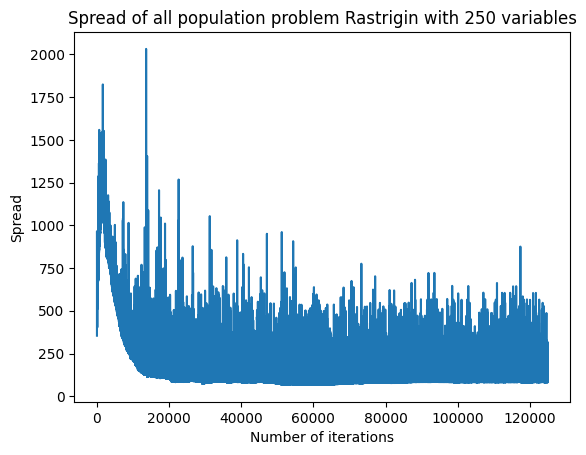

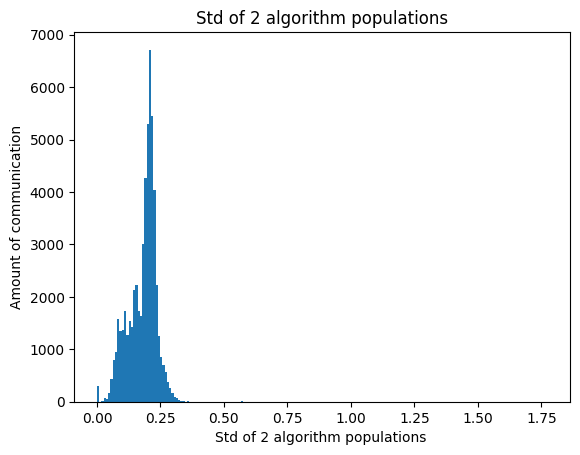

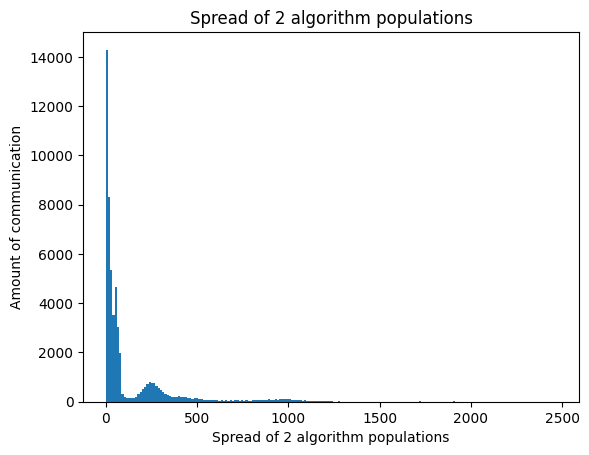

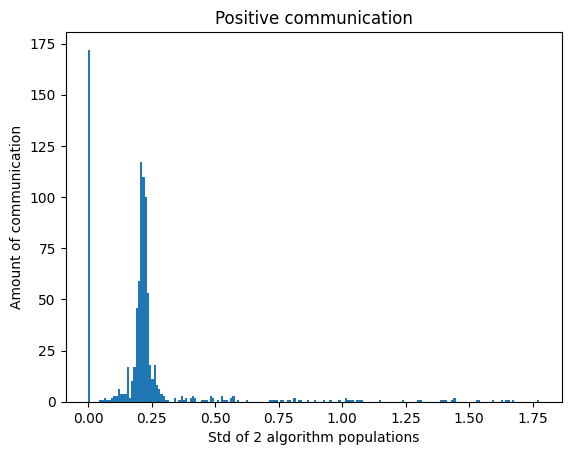

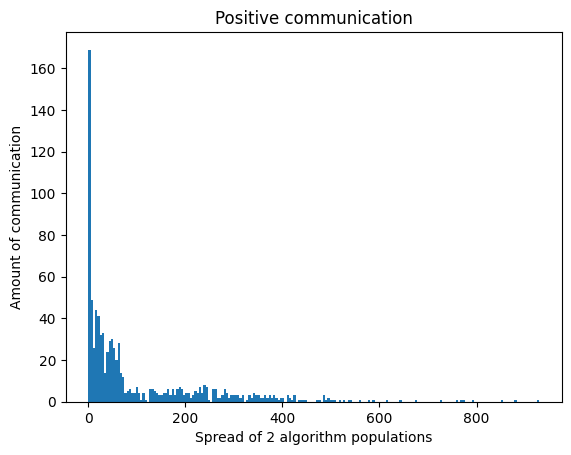

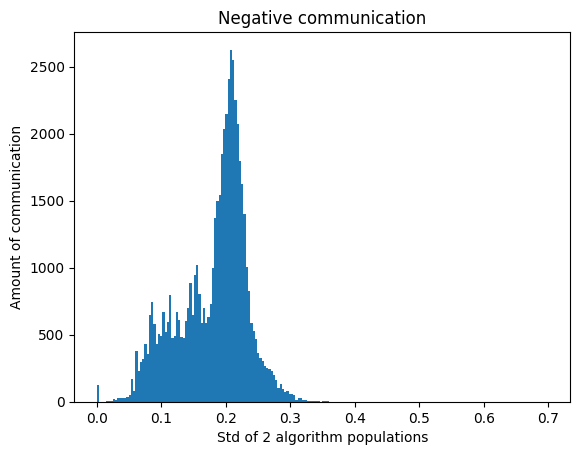

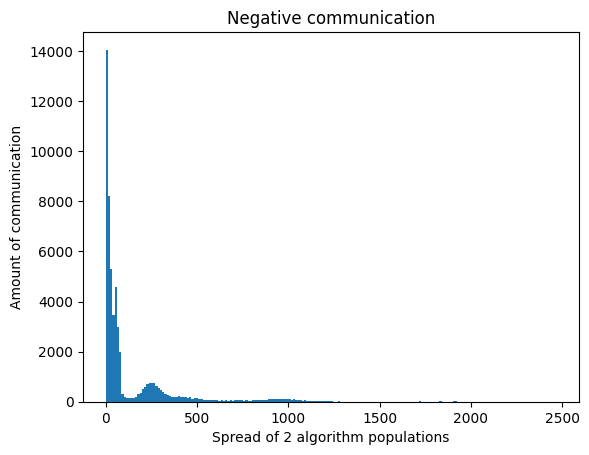

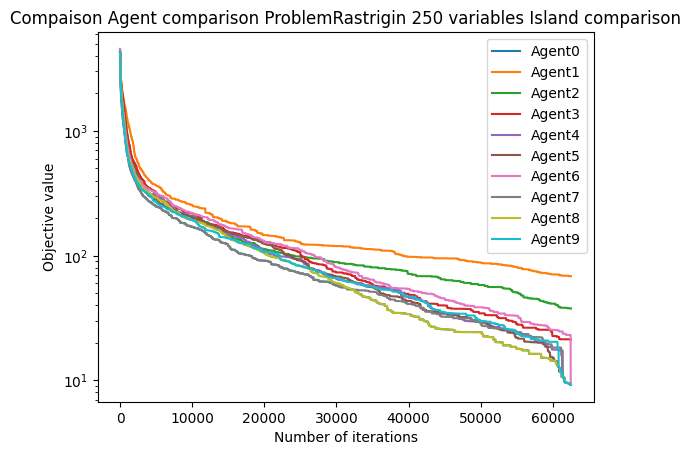

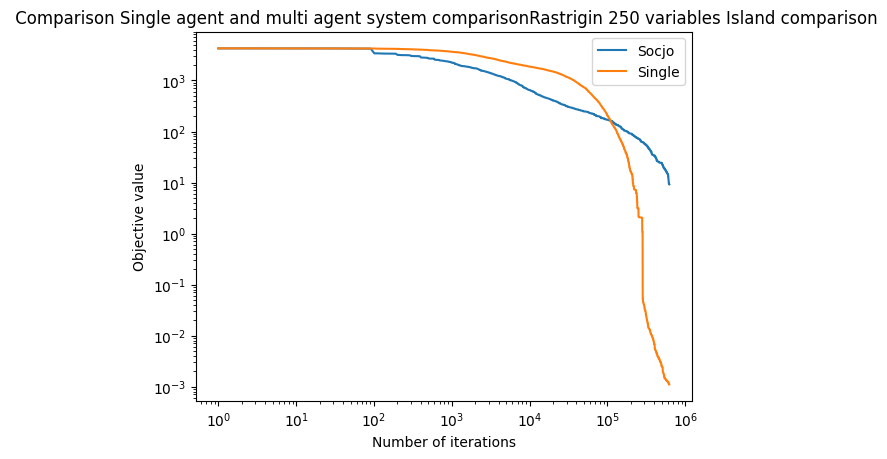

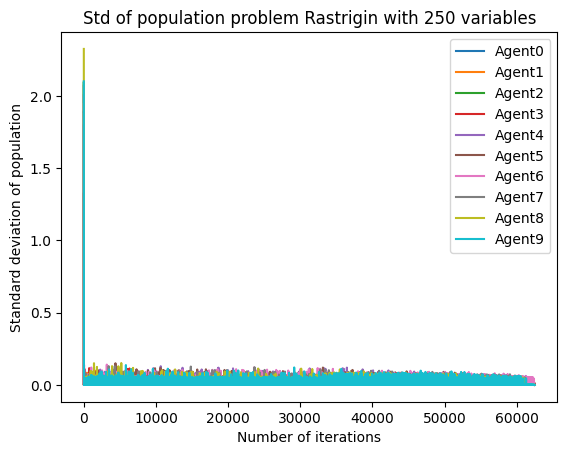

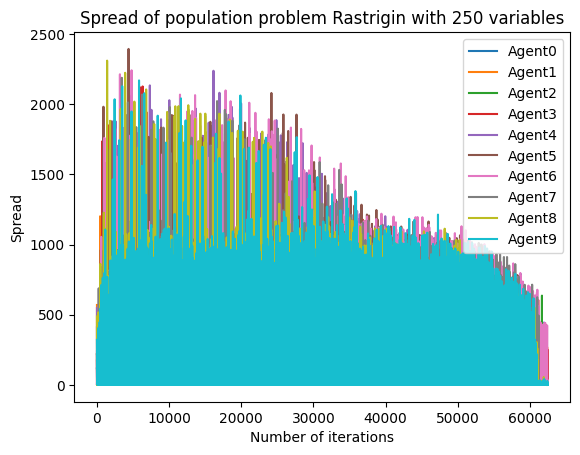

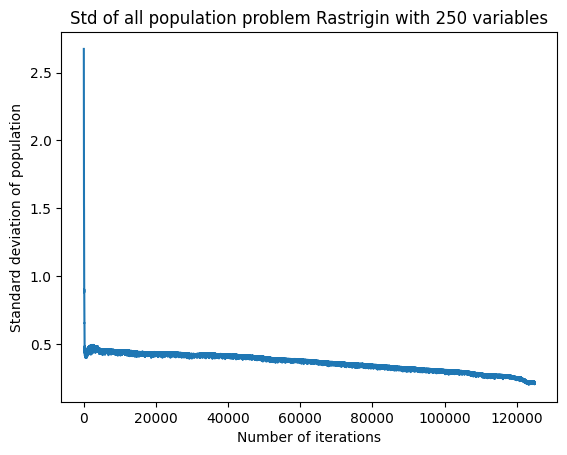

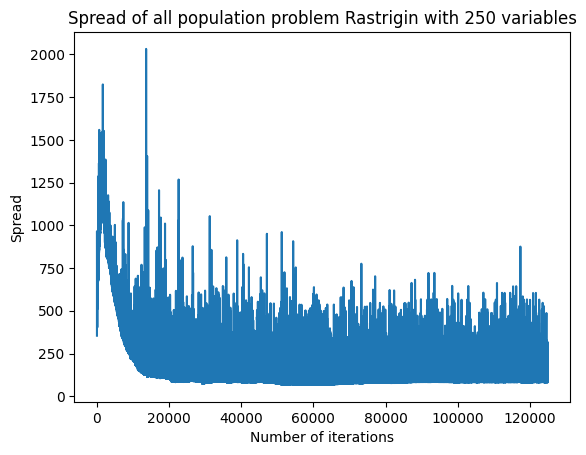

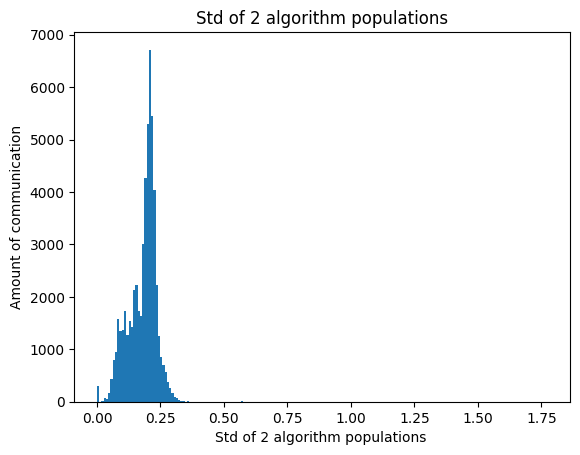

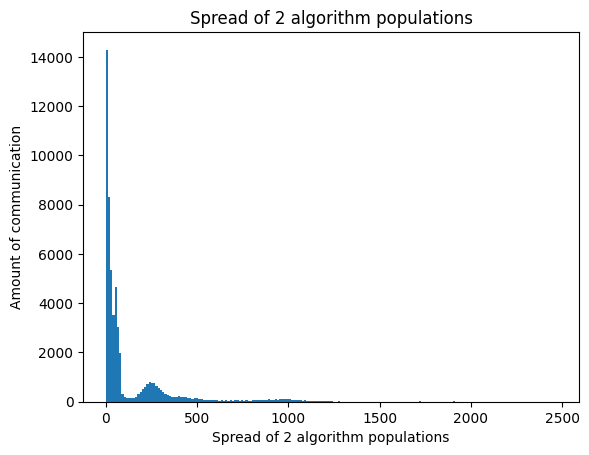

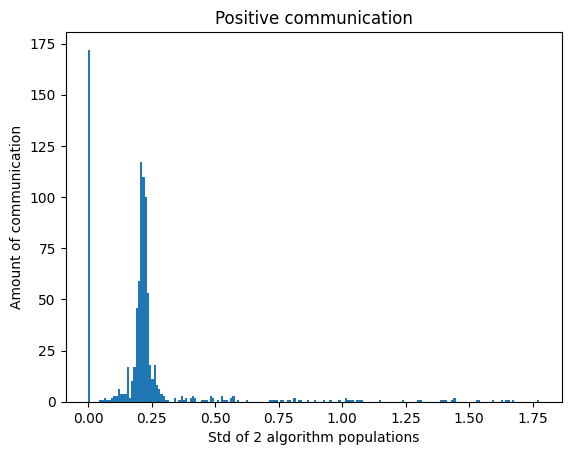

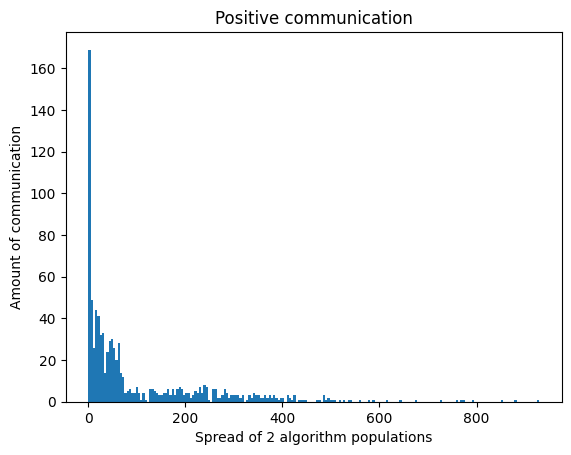

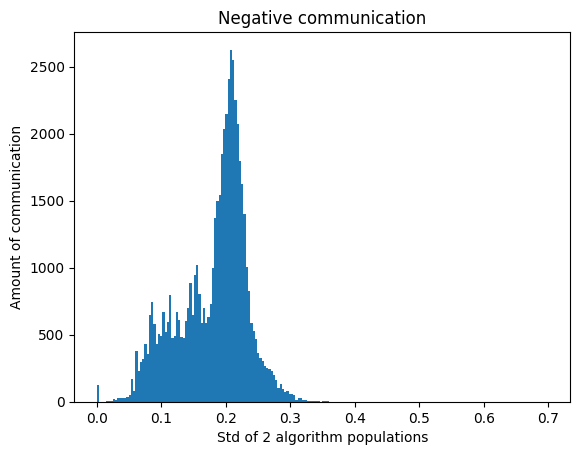

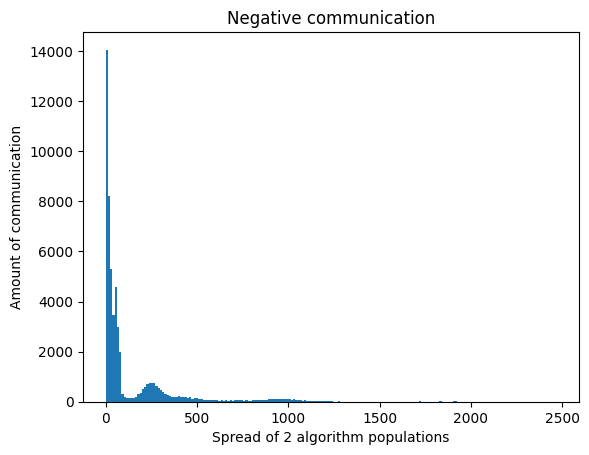

INFO:root:Socjo started
INFO:root:Socjo finished in 44.918651127815245
INFO:root:plotting finished in 0.0
INFO:root:Run 1 out of 3


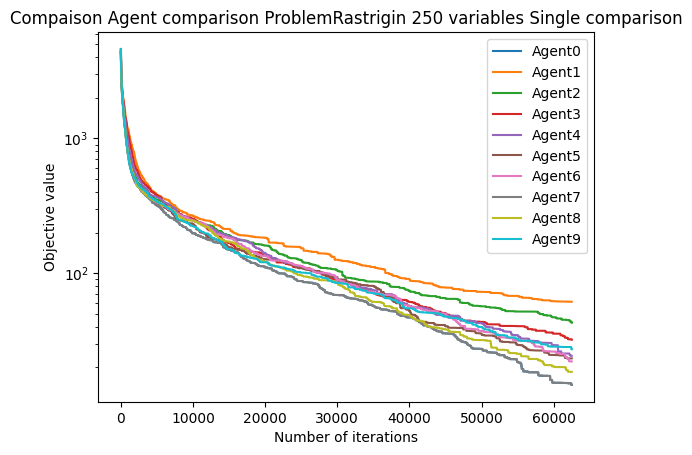

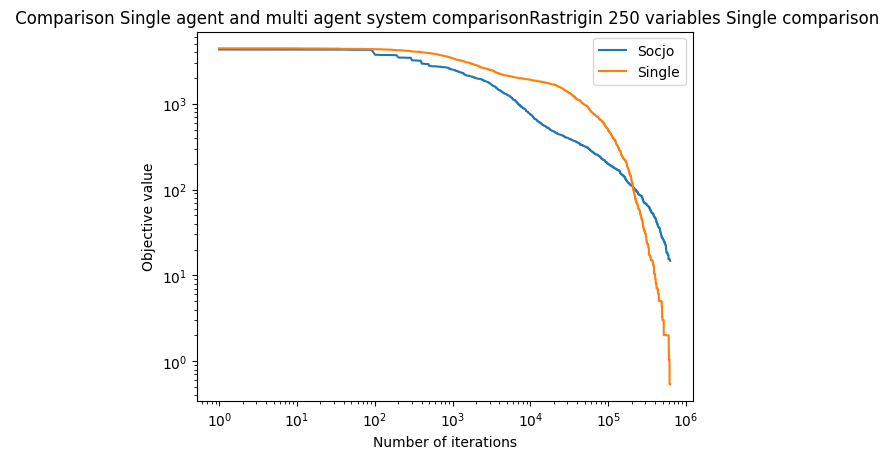

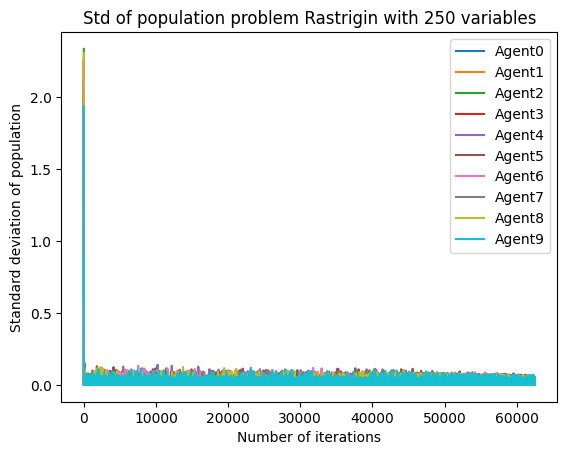

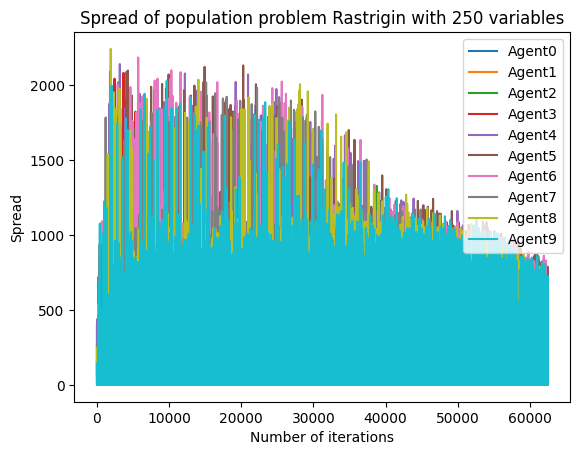

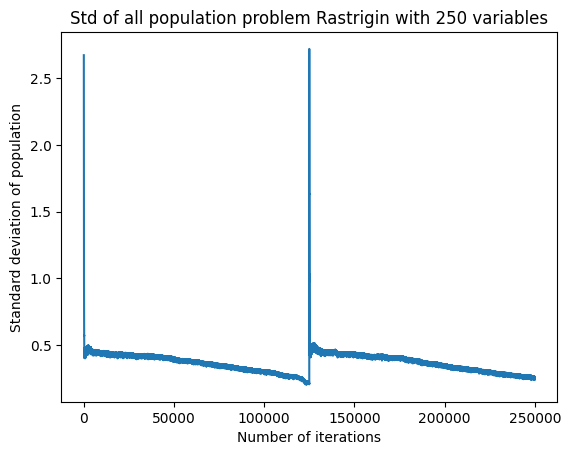

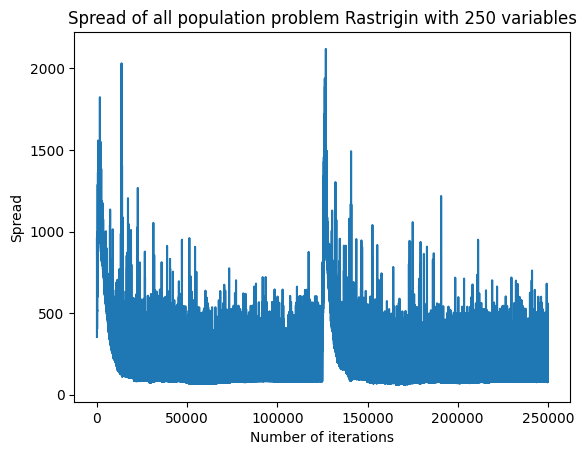

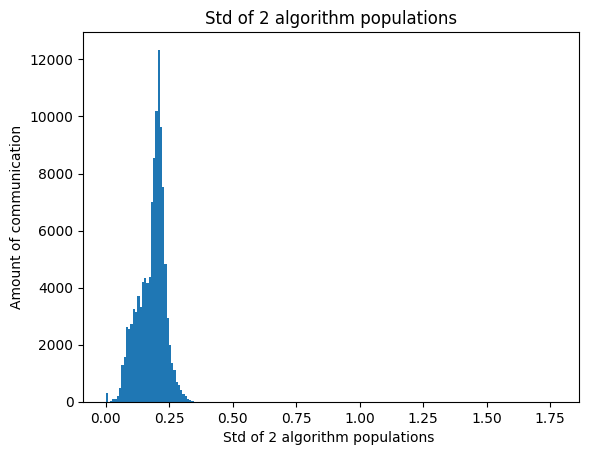

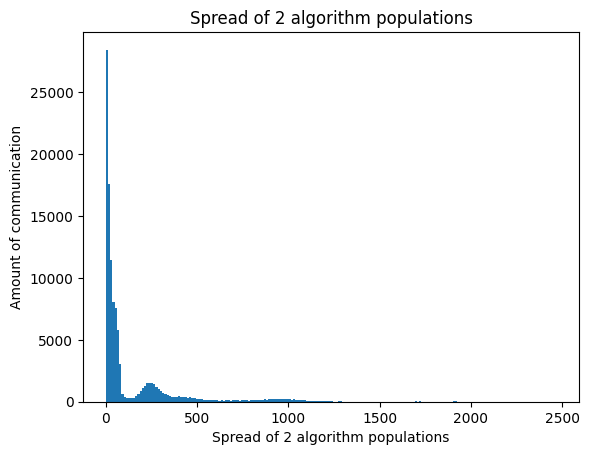

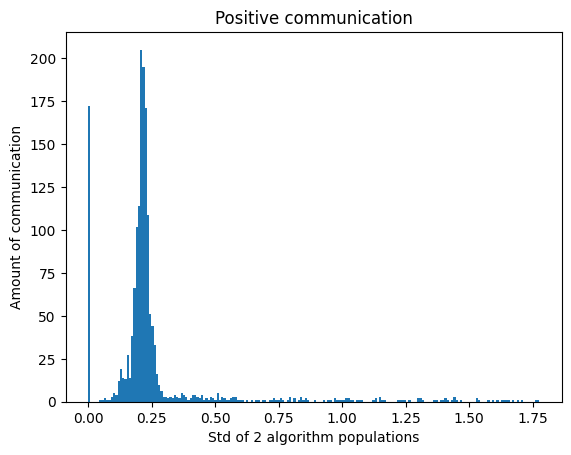

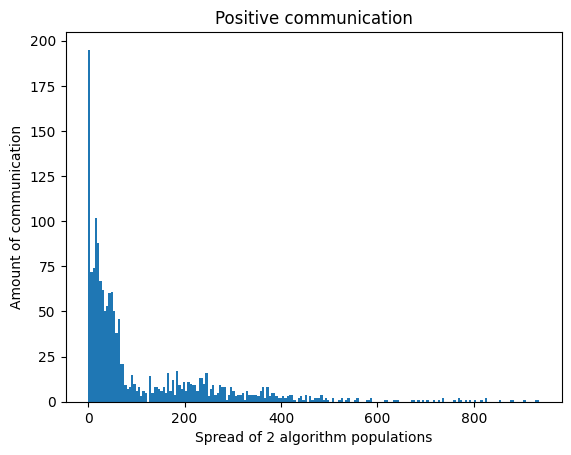

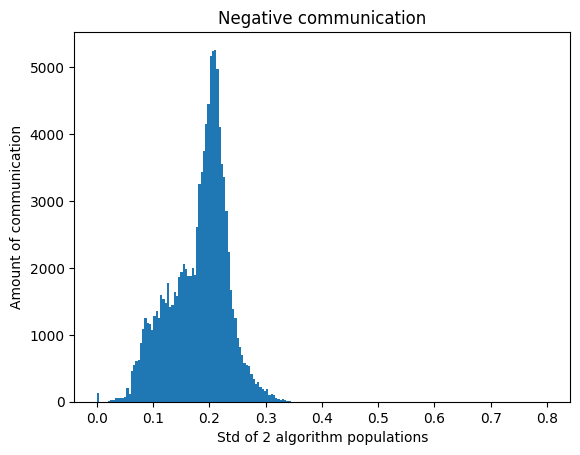

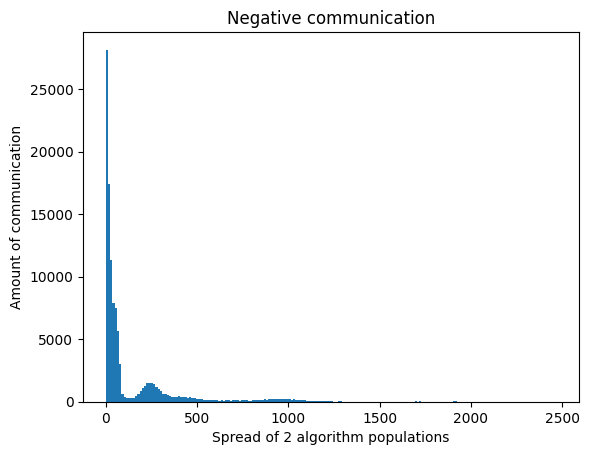

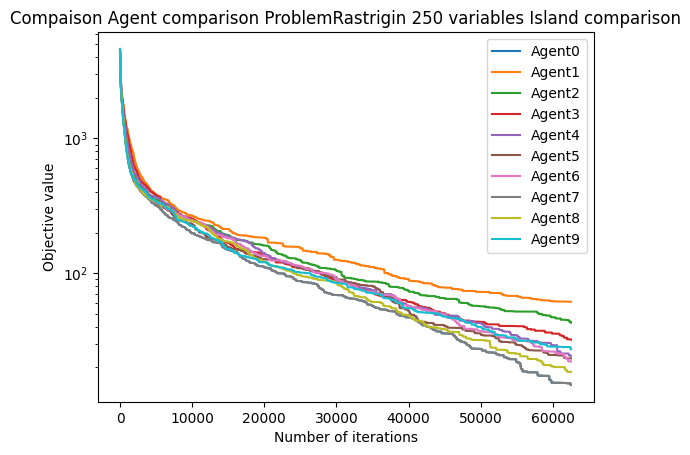

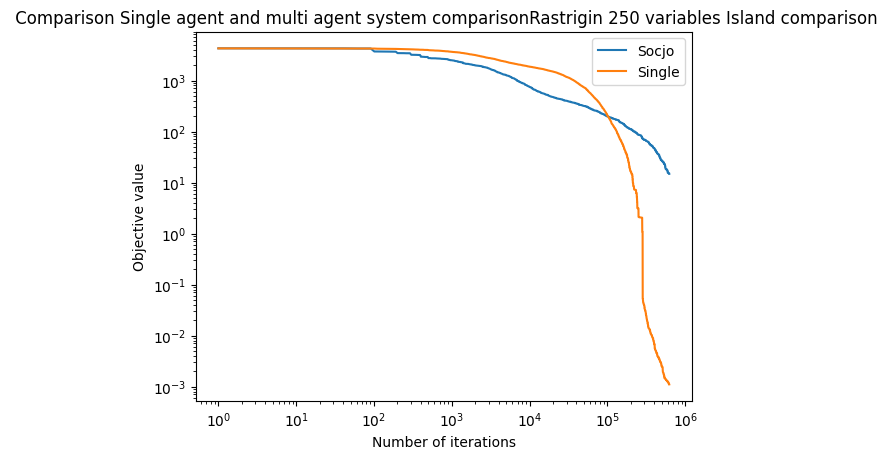

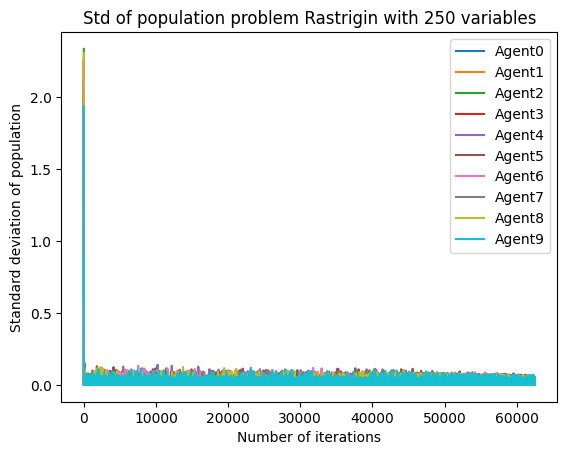

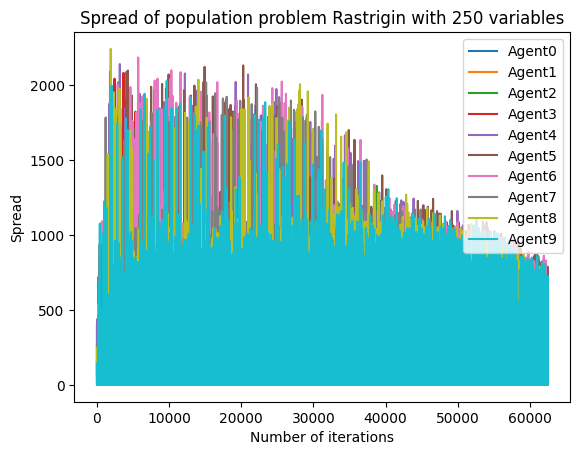

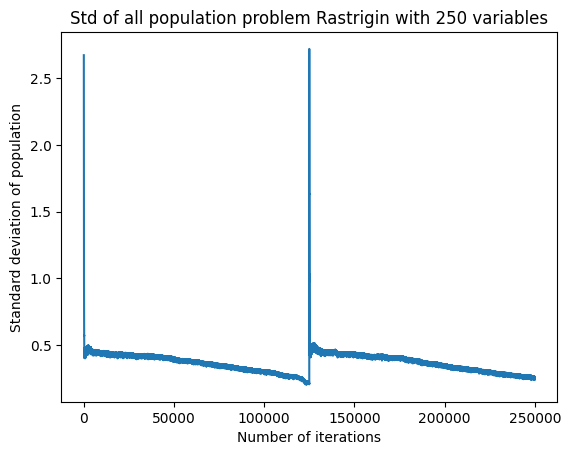

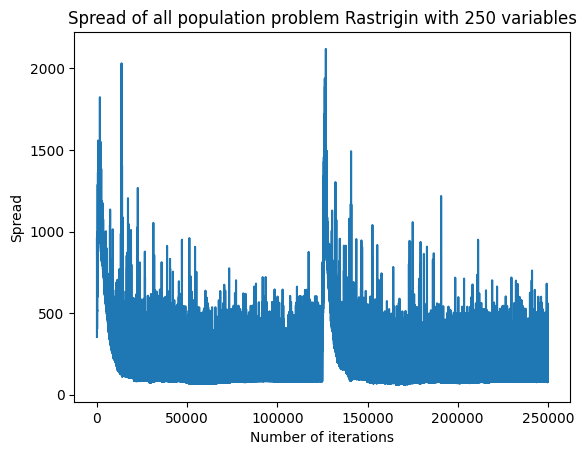

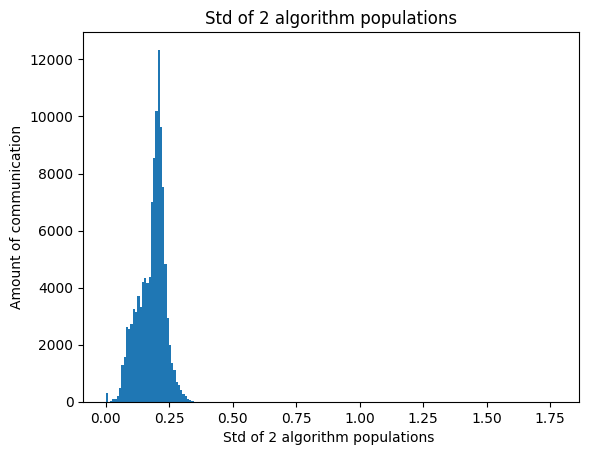

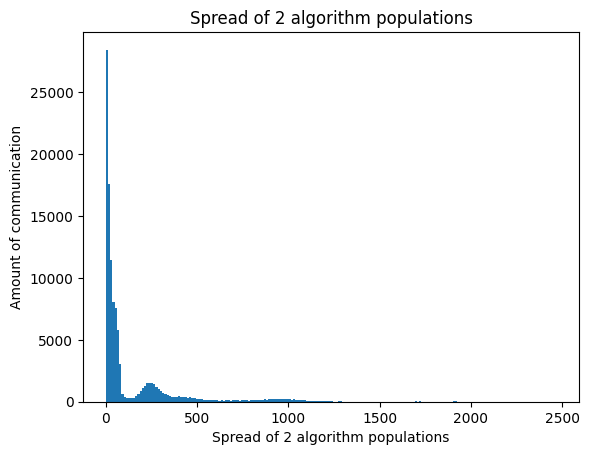

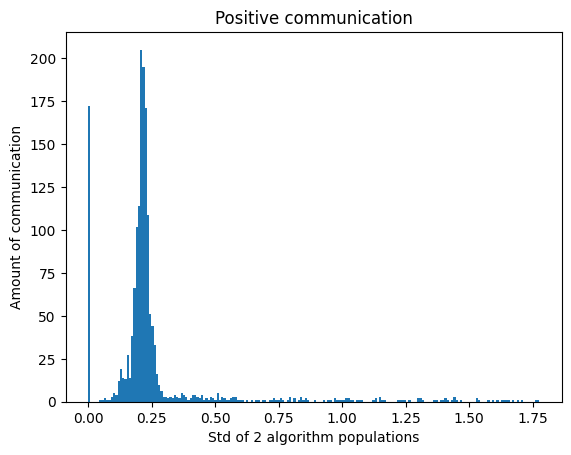

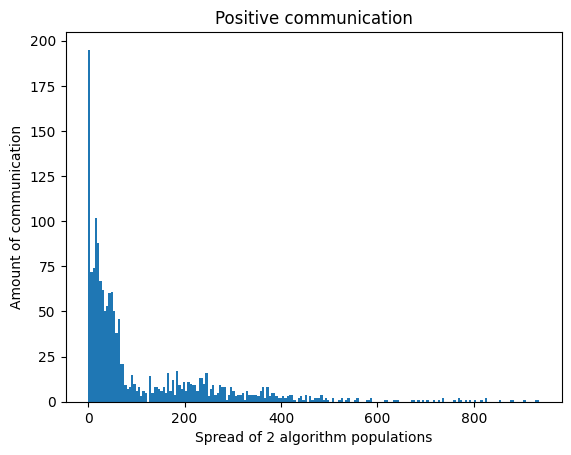

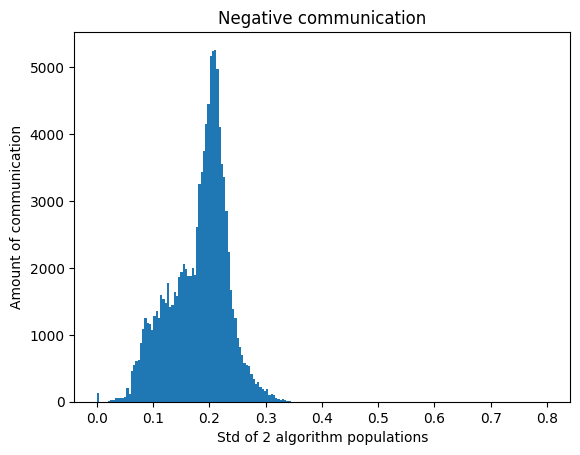

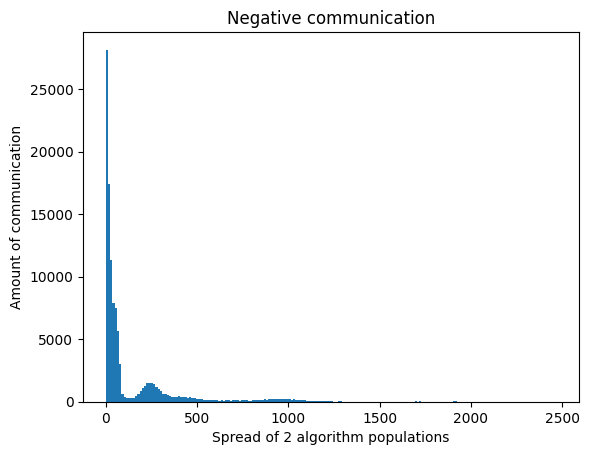

INFO:root:Socjo started
INFO:root:Socjo finished in 44.993466945489246
INFO:root:plotting finished in 0.0
INFO:root:Run 2 out of 3


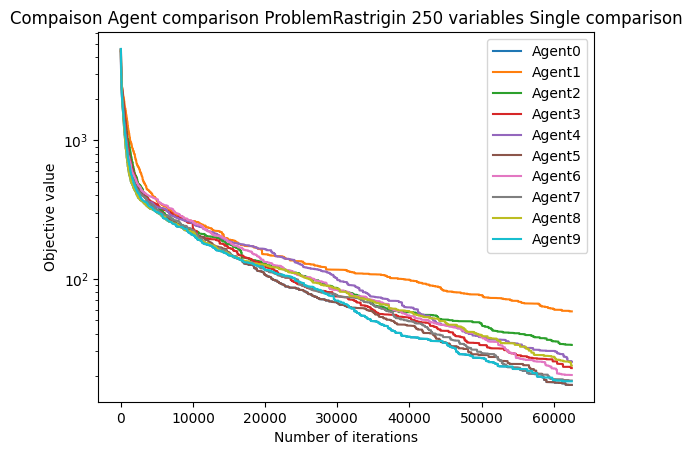

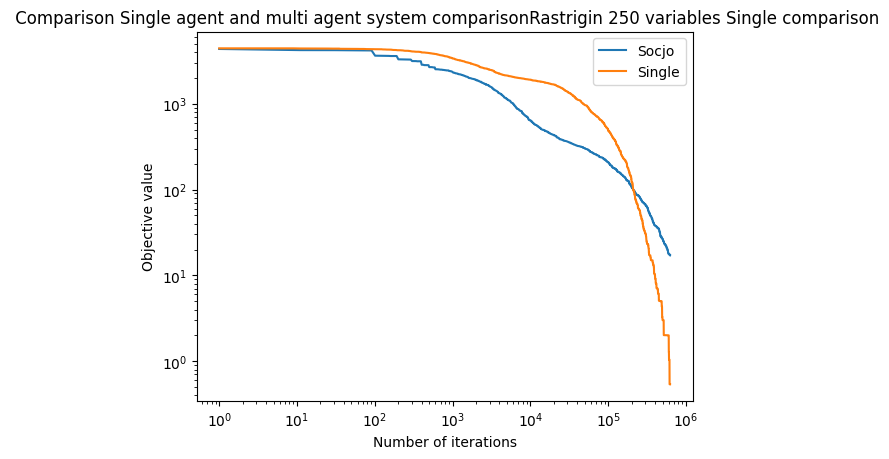

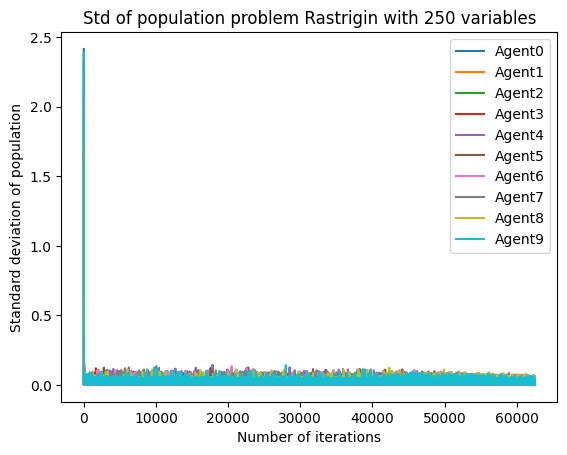

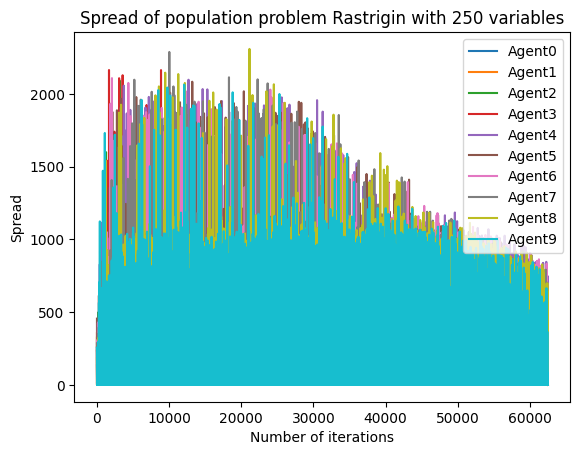

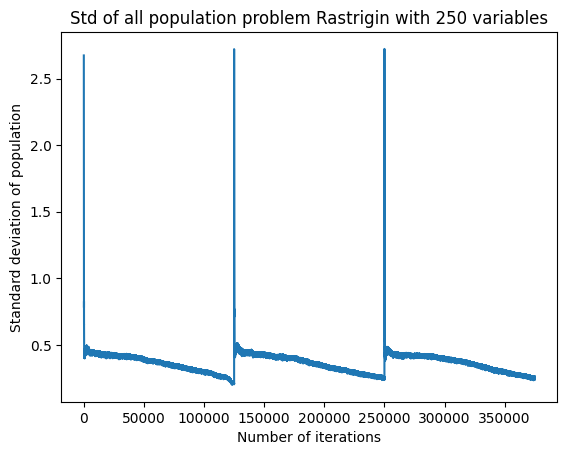

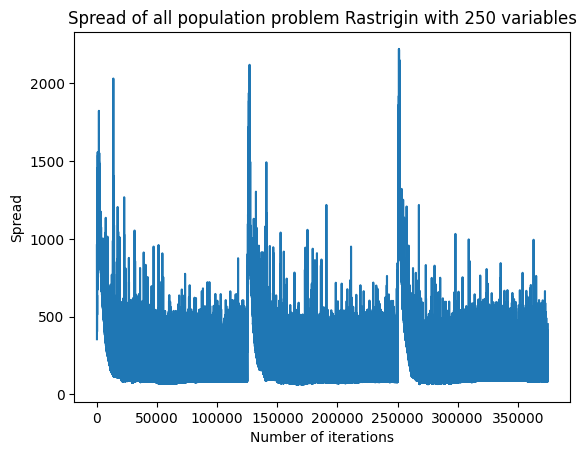

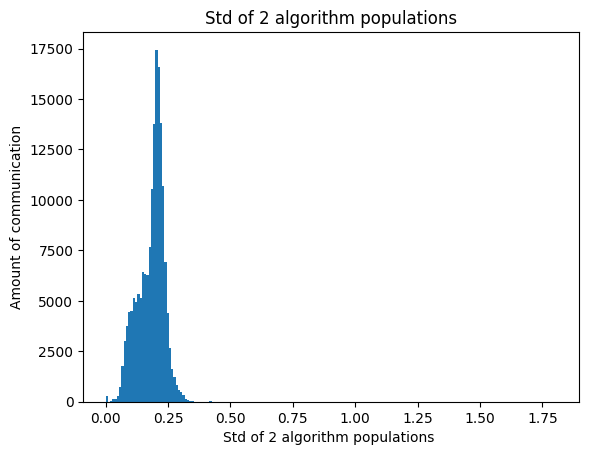

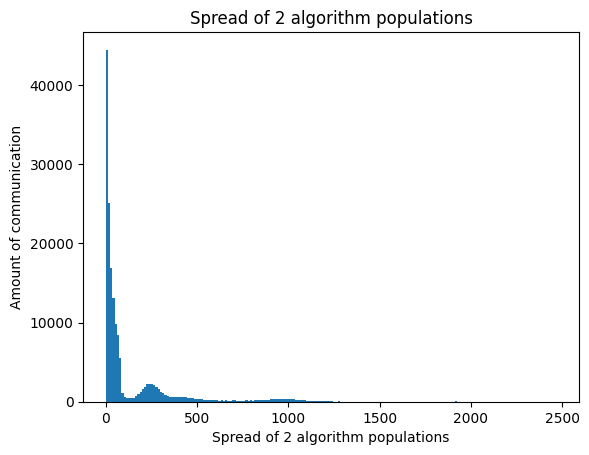

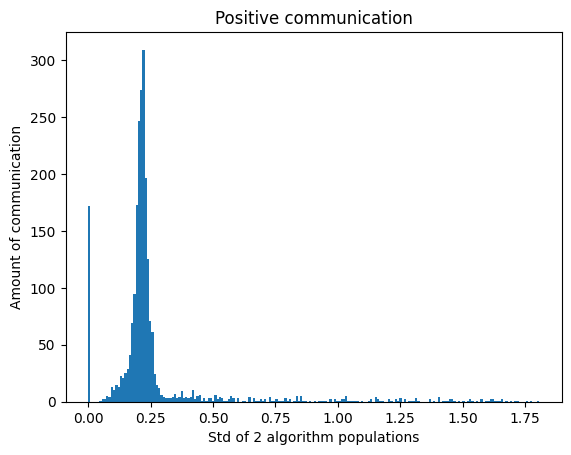

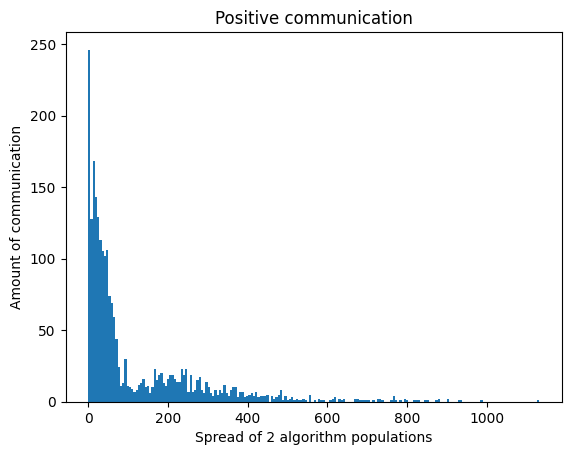

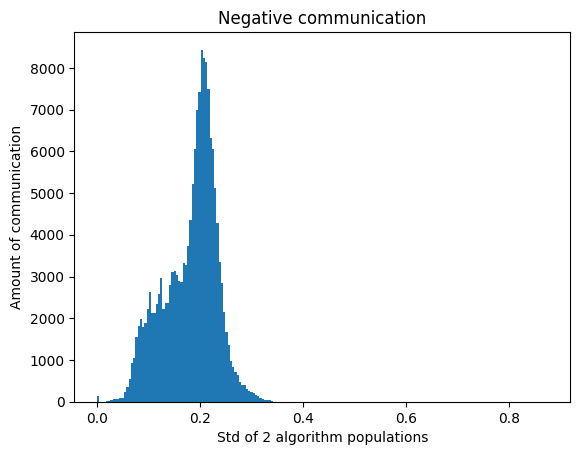

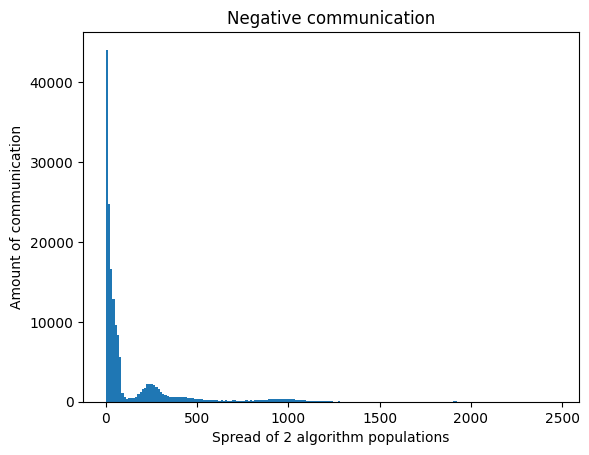

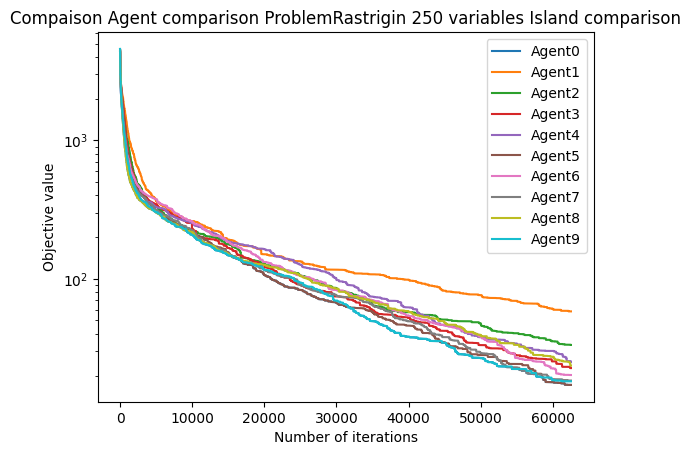

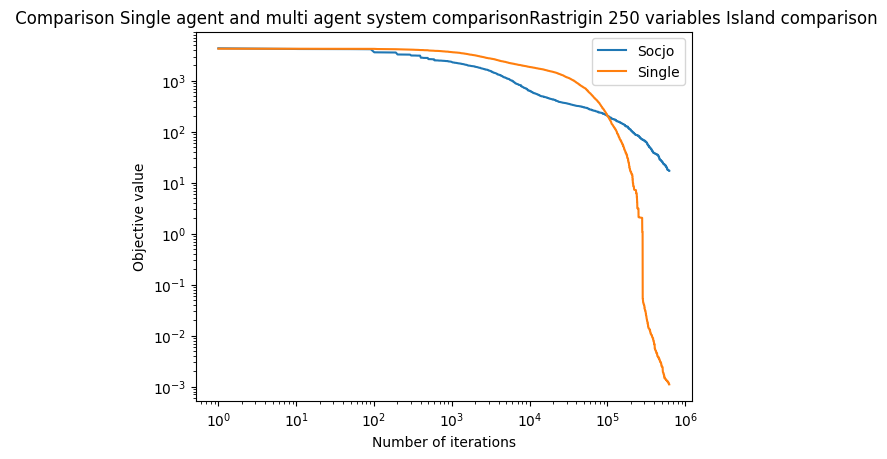

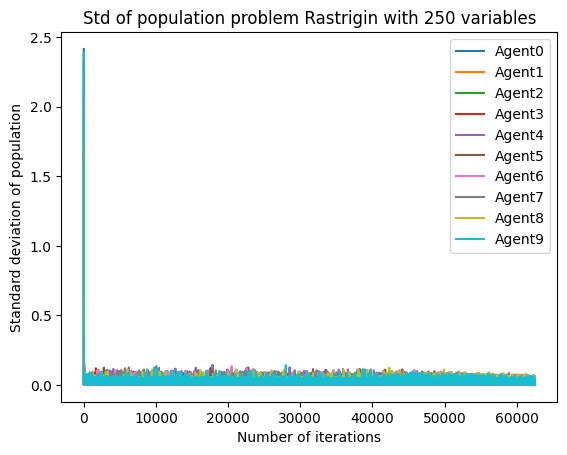

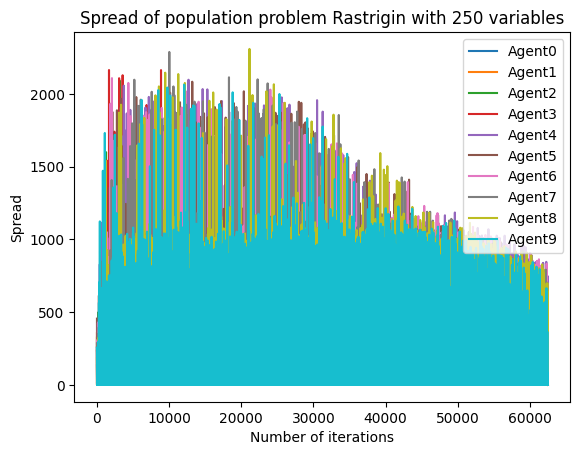

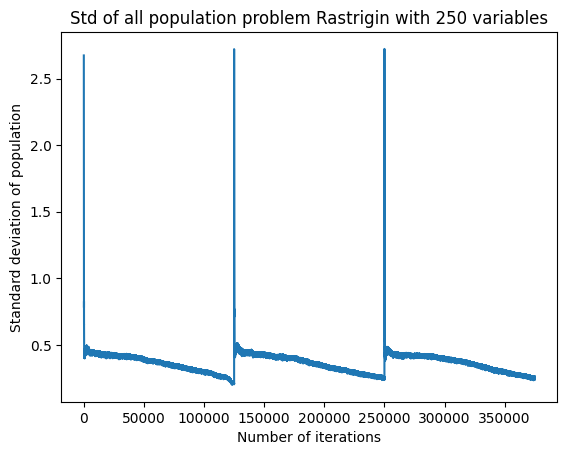

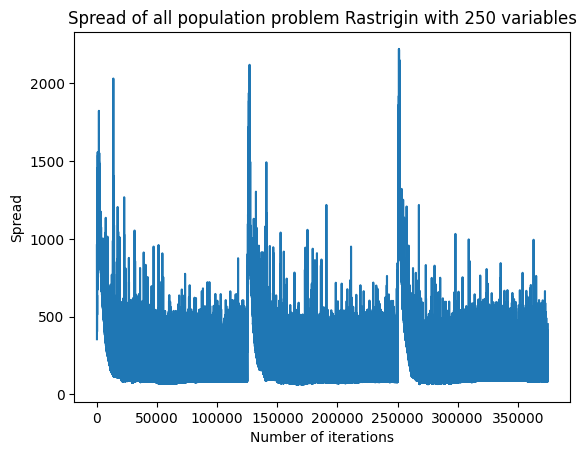

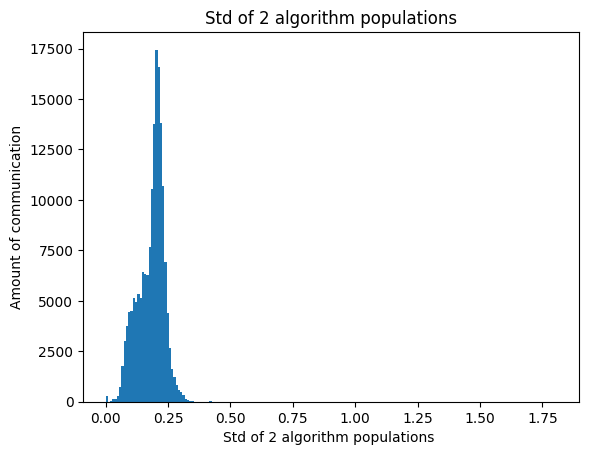

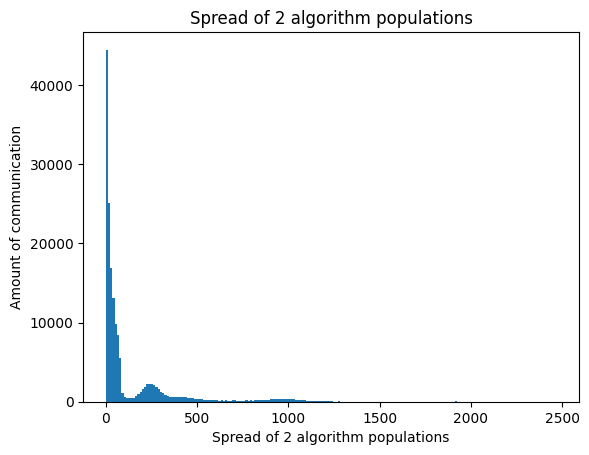

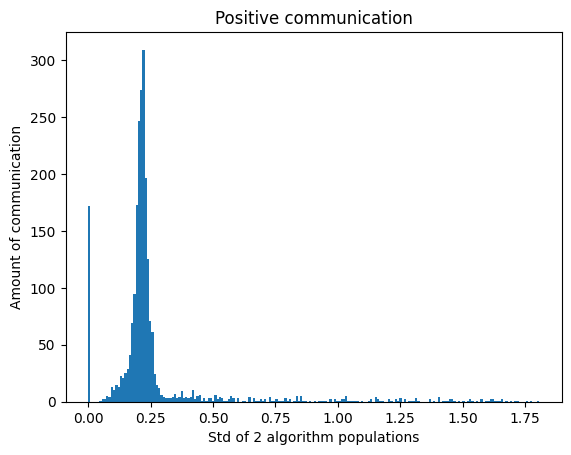

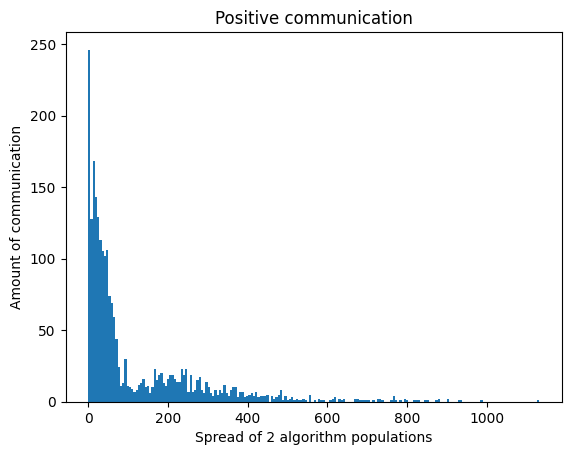

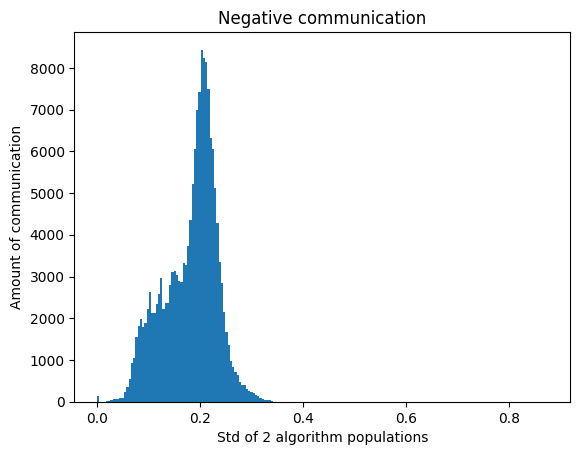

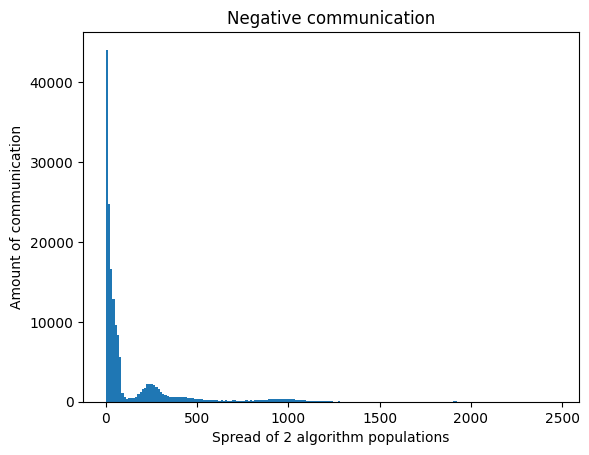

In [1]:
import logging
import os

from runners.bulilders.statistic_builder import StatisticRunnerBuilder
from settings.settings import Settings

Statistic_runner_list = []
prefix = os.path.join("run_configs", "problem")
for agent_no in [10]:
    for idx, config in enumerate(["config_R.json"]):
        with open(os.path.join(prefix, config), "r") as f:
            settings = Settings(f)
        logging.basicConfig(level=logging.INFO)
        config = settings.decodeAgentsData()
        config.noAgents = agent_no
        logging.info(settings.json_settings)
        from jmetal.problem.singleobjective.unconstrained import Rastrigin
        config.problem = Rastrigin(250)
        iterations = config.problem.number_of_variables **2* 10
        statisticRunnerBuilder = StatisticRunnerBuilder()
        statisticRunnerBuilder.set_agents_different_probability(config, 1.3)
        statisticRunnerBuilder.set_run_config(no_runs=3, communication_num=1, iterations=iterations,
                                              communication_freq=10)
        Statistic_runner_list.append(statisticRunnerBuilder.build())
for statistic in Statistic_runner_list:
    statistic.run_an_collect_data()

